# Santiago El Awad
# Machine Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import math
from scipy.integrate import solve_ivp

# Question 1) Developing Computer Program for MidPoint Method:
## Given an ODE of the following form:
### $\dot{u}(t) = f(t, u(t))$
### and BVP: Initial Condition 
### $u(t_{0}) = u_{0}$
### the midpoint method, a one-step method, uses the midpoint estimate of the slope to calculate the next step; hence midpoint information on the slope is first attained, followed by estimation of the $i^{th} +1$ step:
### $u_{i+\frac{1}{2}} = u_{i} +  \frac{\Delta T}{2}f(t_{i}, u_{i})$
### the midpoint datum, $u_{i+\frac{1}{2}}$ is used in our incremental fuinction "f" - as follows:
### $u_{i+1} = u_{i} +  f(t_{i+\frac{1}{2}}, u_{i+\frac{1}{2}})\Delta T $

In [2]:
def Midpoint_method(func,uO,tInitial,tFinal,deltaT):
    '''
    This program solves an first order ODE with MidPoint Method.
    func: is the function containing t and x as inputs f(t,x):
    uO: initial condition
    tInitial: is the start time
    tFinal: is the final time
    deltaT: is the time-step
    
    By: Santiago El Awad
    '''
    u = [uO]
    t = [tInitial]
    
    
    if tFinal - t[-1] < deltaT:
            deltaT = tFinal - t[-1]
    
    while t[-1] <= tFinal:
            u_mid = u[-1] + 0.5*deltaT*func(t[-1],u[-1])
            u = u + [u[-1] + func((t[-1]+(deltaT/2)),u_mid)*deltaT]
            t = t + [t[-1] + deltaT] 
    return t, u

### Here, I will test the code using the same ODE in Problem #3 from this assignment (refer below):
## a) ODE with BC 
### $\dot{u} + [0.25 + 2 \pi sin(2 \pi t)] u = 0  $ ,  
### $f(t,u) = -[0.25 + 2 \pi sin(2 \pi t)] u$ (our incremental function)
### where, $ u(t = 0) = 1$ 


In [3]:
def AnalyticalSolution(t):
    uExact = np.exp(np.cos(2*np.pi*t)-.25*t-1)
    vExact = -(2*(np.pi)*np.sin(2*np.pi*t)-0.25)*np.exp(np.cos(2*np.pi*t)-.25*t-1)
    return uExact, vExact

In [4]:
#Analytical Solution of the ODE:
h=.01
tInitial,tFinal=0,5
tExact = np.arange(tInitial,tFinal,h)
uExact = np.zeros((len(tExact),1))
vExact = np.zeros((len(tExact),1))
for i in range (len(tExact)):
    uExact[i],vExact[i] = AnalyticalSolution(tExact[i])

In [5]:
def incrementalfunct(t,u):
    return -u*(0.25 + 2*np.pi*np.sin(2*np.pi*t))

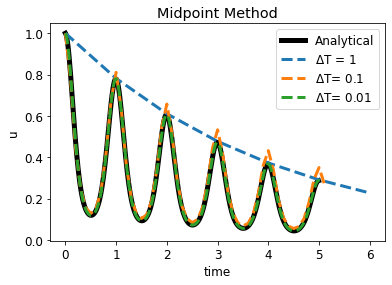

In [6]:
tstep_midpoint = [1,0.1,0.01]
plt.plot(tExact,uExact, 'black', linewidth = 5)
for i in range(len(tstep_midpoint)):
    t_midpoint, u_midpoint = Midpoint_method(incrementalfunct,1,0,5,tstep_midpoint[i])
    plt.plot(t_midpoint,u_midpoint, '--' ,linewidth = 3)
plt.xlabel('time')
plt.ylabel('u')
plt.title('Midpoint Method')
plt.legend(['Analytical',r'$\Delta$T = 1',r'$\Delta$T= 0.1',r'$\Delta$T= 0.01'])

# Question 2) Developing Computer Program for RK4:
## Given an ODE of the following form:
### $\dot{u}(t) = f(t, u(t))$
### and BVP: Initial Condition 
### $u(t_{0}) = u_{0}$
### The Runge-Kutta method uses an average weighted slope approach to calculate the next point.
### $u_{n+1}=u_{n}+\frac{\Delta T}{6}\left(k_1+2k_2+2k_3+k_4\right)$
### where, the k coefficients are:
### $k_{1} = f(t_{n}, u_{n})$ 
### $k_{2} = f(t_{n} + \frac{h}{2}, u_{n} + k_{1}\frac{\Delta T}{2})$ 
### $k_{3} = f(t_{n} + \frac{h}{2}, u_{n} + k_{2}\frac{\Delta T}{2})$ 
### $k_{4} = f(t_{n} + h, u_{n} + k_{3}\Delta T)$ 



In [7]:
def myRK4(func,uO,tInitial,tFinal,deltaT):
    '''
    This program solves an first order ODE with RK4 Method.
    func: is the function containing t and x as inputs f(t,x):
    uO: initial condition
    tInitial: is the start time
    tFinal: is the final time
    deltaT: is the time-step
    
    By: Santiago El Awad
    '''
    u = [uO]
    t = [tInitial]
    
    if tFinal - t[-1] < deltaT:
            deltaT = (tFinal - t[-1])/10
    
    while t[-1] <= tFinal:
        #Calculate the k coefficients:
        k1 = func(t[-1],u[-1])
        k2 = func((t[-1] + 0.5*deltaT), u[-1] + 0.5*k1*deltaT)
        k3 = func((t[-1] + 0.5*deltaT), u[-1] + 0.5*k2*deltaT)
        k4 = func((t[-1] + deltaT), u[-1] + k3*deltaT)
        #Calculate the i+1 step:
        u = u + [u[-1] + (deltaT/6)*(k1 + 2*k2 + 2*k3 + k4)]
        t = t + [t[-1] + deltaT] 
    return t, u

### Here, I will test the code using the same ODE in Problem #3 from this assignment (refer below):
## ODE with IVP 
### $\dot{u} + [0.25 + 2 \pi sin(2 \pi t)] u = 0  $ ,  
### $f(t,u) = -[0.25 + 2 \pi sin(2 \pi t)] u$ (our incremental function)
### where, $ u(t = 0) = 1$ 

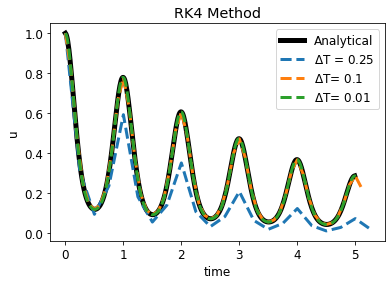

In [8]:
tstep = [0.25,0.1, 0.01]
plt.plot(tExact,uExact, 'black', linewidth = 5)
for i in range(len(tstep)):
    t_RK4, u_RK4 = myRK4(incrementalfunct,1,0,5,tstep[i])
    plt.plot(t_RK4,u_RK4, '--' ,linewidth = 3)
plt.xlabel('time')
plt.ylabel('u')
plt.title('RK4 Method')
plt.legend(['Analytical',r'$\Delta$T = 0.25',r'$\Delta$T= 0.1',r'$\Delta$T= 0.01'])

# Question 3):
## ODE Solver
Solving an ODE with a time-stepping scheme: 

### $d^{(n)} \approx u(t = t_{n}) $

### $v^{(n)} \approx \dot{u}(t = t_{n}) $


## The Ordinary Differential Equation taking the following form:
### $\dot{u} + \lambda u = 0  $

### BVP: Initial Conditions:
### $d^{(0)} = u(t = 0) $
### $v^{(0)} =  -(\lambda) d^{(0)}  \hspace{180mm}$

### The discrete form of the ODE takes the form:

### $v^{(n+1)} =  -(\lambda) d^{(n+1)}  \hspace{182mm}$ (Eq.1)

### $d^{(n+1)} = d^{(n)} + \Delta T [(1-\gamma) v^{(n)} + \gamma v^{(n+1)}] \hspace{133mm}$  (Eq.2)

### Substitution allows the relationship:

### $v^{(n+1)} =  -\frac{\lambda}{1+\gamma\lambda \Delta T} [d^{(n)} + \Delta T (1-\gamma) v^{(n)}] $
### Containing solely, $v^{(n+1)}$ as unknown. Follow up by finiding $d^{(n+1)}$ and iterate over the time interval with the appropriate time step ($\Delta T$) .

### the function created with name "my_ODE_solver" implements the above algorithm:

In [9]:
def lmbda_t(t):
    return 0.25 + 2*np.pi*np.sin(2*np.pi*t)

def my_ODE_solver(u0,lmbda_tf,tInitial,tFinal,deltaT,gamma):
    time = np.arange(tInitial,tFinal+deltaT,deltaT)
    nSteps = len(time)
    u = np.zeros(nSteps)
    v = np.zeros(nSteps)
    u[0] = u0
    v[0] = -lmbda_t(tInitial) * u0
    for i in range(nSteps-1):
        lmbda = lmbda_t(time[i+1]) 
        v[i+1] = -((lmbda) / (1 + gamma*lmbda*deltaT)) * (u[i] + (deltaT * (1 - gamma) * v[i])) 
        u[i+1] = u[i] + deltaT * ( (1 - gamma) * v[i] + gamma * v[i+1] )
    return time, u, v

# Q#3 - Part (a)
## a) ODE with BC 
### $\dot{u} + [0.25 + 2 \pi sin(2 \pi t)] u = 0  $ ,  
### where, $ u(t = 0) = 1$ 
### Separation of variables
### $\dfrac{\dot{u}}{u} = -0.25 - 2 \pi sin(2 \pi t) $
### Perform integral
### $\int\dfrac{\dot{u}}{u} dt = \int (-0.25 - 2 \pi sin(2 \pi t))dt$
### $ln(u) = -0.25t + cos(2 \pi t) + C $
### $u(t) = e^{-0.25t + cos(2 \pi t) + C} $
### Implement u(0) = 1, leading to C = -1
### $u(t) = e^{-0.25t + cos(2 \pi t) -1} $

# Q#3: 
# Part b) Forward Euler Scheme:
# Part c) Backward Euler Scheme:

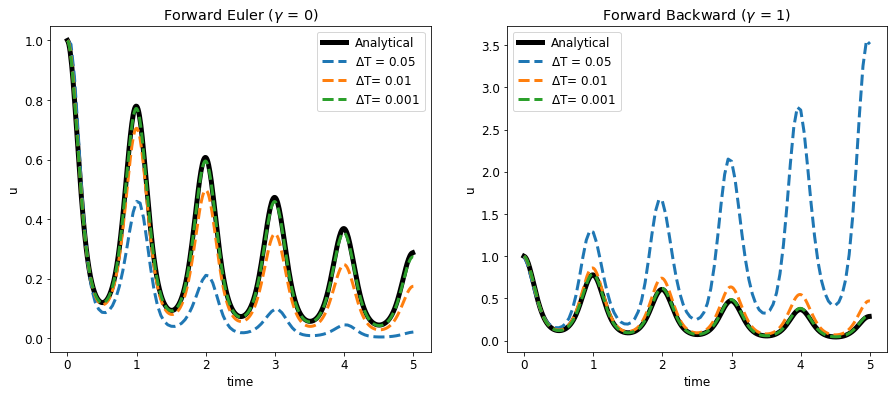

In [10]:
uO = 1 
tInitial = 0
tFinal = 5
#Provide 3 time intervals:
deltaT=[.05,.01,.001]
deltaT[2]
    
#Forward Euler (gamma = 0)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.figure(1)
plt.plot(tExact,uExact, 'black', linewidth = 5)
for i in range(len(deltaT)):
    t,d,v = my_ODE_solver(uO, lmbda_t ,tInitial,tFinal,deltaT[i],0)
    plt.plot(t,d, '--',linewidth = 3)
    plt.xlabel('time')
    plt.ylabel('u')
    
plt.title(r'Forward Euler ($\gamma$ = 0)' )
plt.legend(['Analytical',r'$\Delta$T = 0.05',r'$\Delta$T= 0.01',r'$\Delta$T= 0.001'])

#Backward Euler
plt.subplot(1,2,2)
plt.plot(tExact,uExact, 'black', linewidth = 5)
for i in range(len(deltaT)):
    t,d,v = my_ODE_solver(uO, lmbda_t ,tInitial,tFinal,deltaT[i],1)
    plt.plot(t,d, '--',linewidth = 3)
    plt.xlabel('time')
    plt.ylabel('u')
plt.title(r'Forward Backward ($\gamma$ = 1)' )
plt.legend(['Analytical',r'$\Delta$T = 0.05',r'$\Delta$T= 0.01',r'$\Delta$T= 0.001'])


# Question #4: Consider the following system of ordinary differential equations
### $\dot{x}(t) = -y(t)$ $\hspace{30mm}$ $\dot{y}(t) = x(t)$
### $x(0) = 2$ $\hspace{40mm}$  $y(0) = 0$

## (a) Obtain the analytical solution
### By inspection,
### $y(t) = 2sin(t)$ 
### $x(t) = 2cos(t)$

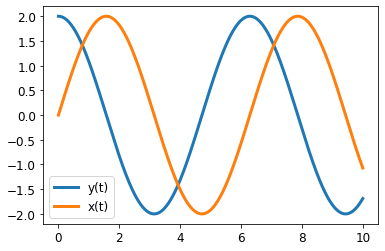

In [11]:
t = np.arange(0,10,0.01)
y = 2*np.sin(t)
x = 2*np.cos(t)
plt.plot(t,x,t,y, linewidth = 3)
plt.legend(['y(t)','x(t)'])

# Question #5: Non-conservative oscillator with nonlinear damping
### $m\ddot{x} - \eta(1-x^2)\dot{x} + kx = 0$
### $x(0) = 1, \dot{x}(0) = 0 $
### $m = 1, \eta = 500 , k = 1$
###  t $\epsilon $ [0,2500]
### Define the following variables:
### $y_1 = x$
### $y_2 = \dot{x}$
### $\dot{y_2} = \ddot{x}$
### Rewrite the 2nd Order ODE into a 1st Order ODE:
$\dot{y_2} = \dfrac{\eta(1-y_{1}^2)y_{2} - ky_{1}}{m}$
### where,
### $y_{1}(0) = 1$ $\hspace{40mm}$  $y_{2}(0) = 0$
### $y_{1}'(0) = 0$ $\hspace{40mm}$  $y_{2}'(0) = \dfrac{\eta(1-y_{1}^2)y_{2} - ky_{1}}{m} = -1$ 


## Time Stepping Scheme formulation: Trapezoidal Family 

### $d_{1}^{(n+1)} = d_{1}^{(n)} + \Delta T [(1-\gamma) v_{1}^{(n)} + \gamma v_{1}^{(n+1)}]$$\hspace{135mm}$  (Eq.1)  
### $d_{2}^{(n+1)} = d_{2}^{(n)} + \Delta T [(1-\gamma) v_{2}^{(n)} + \gamma v_{2}^{(n+1)}]$ $\hspace{133mm}$  (Eq.2) 
### $v_{1}^{(n+1)} = d_{2}^{(n+1)}$$\hspace{194mm}$  (Eq.3)
### $v_{2}^{(n+1)} = \dfrac {\eta(1-(d_{1}^{(n+1)})^2)d_{2}^{(n+1)} - kd_{1}^{(n+1)}}{m}$ $\hspace{133mm}$  (Eq.4)

### By solving the system of equations above (notice 4 equations, 4 unknowns) we can implement the algorithm.

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2328\361104617.py:3: RuntimeWarning: overflow encountered in double_scalars
  return (eta*(1-y1**2)*y2-k*y1)/m
C:\Users\Santiago\AppData\Local\Temp\ipykernel_2328\361104617.py:14: RuntimeWarning: invalid value encountered in double_scalars
  u[i+1, 1] = u[i,1] + deltaT * ( v[i,1] )


Text(0, 0.5, '$y_{1}(t) = x(t)$')

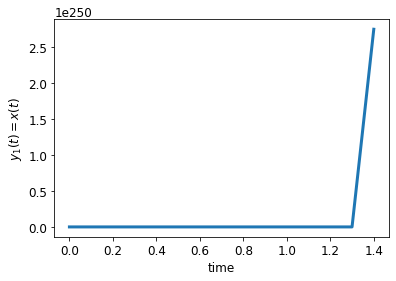

In [25]:
def lambda_func(y1,y2):
    m = 1; eta = 500 ; k = 1
    return (eta*(1-y1**2)*y2-k*y1)/m

def my_ODE_solver2_FE(u0,lmbda_func,tInitial,tFinal,deltaT):
    time = np.arange(tInitial,tFinal+deltaT,deltaT)
    nSteps = len(time)
    u = np.zeros((nSteps,2))
    v = np.zeros((nSteps,2))
    u[0] = u0[0, :]
    v[0] = u0[1,:]
    for i in range(nSteps-1):
        u[i+1, 0] = u[i,0] + deltaT * ( v[i,0] )
        u[i+1, 1] = u[i,1] + deltaT * ( v[i,1] )
        v[i+1, 0] = u[i+1,1]
        v[i+1,1] = lmbda_func(u[i+1,0],u[i+1,1]) 
    return time, u, v

uO = np.array([[1,0],[0,-1]])
tInitial = 0; tFinal = 2500; deltaT = 0.1
time, u, v = my_ODE_solver2_FE(uO,lambda_func ,tInitial, tFinal, deltaT)
plt.plot(time, u[:,0],linewidth = 3)
plt.xlabel('time')
plt.ylabel('$y_{1}(t) = x(t)$')

### The Forward Euler Scheme fails to solve numerically the ODE!
# Q5. (c, d) Use Python's built-in solvers:
Use using 

In [29]:
def lambda_func(t, y):
    m = 1; eta = 500 ; k = 1
    return [y[1], (eta * ( 1 - y[0] ** 2) * y[1] - k*y[0])/m]
IVP = [1,0]
# IVP Runge Kutta
ivp = solve_ivp(lambda_func, [0, 2500], IVP, method='RK45')
# ‘BDF’: Implicit multi-step variable-order 
BDF = solve_ivp(lambda_func, [0, 2500], IVP, method='BDF')

Text(0, 0.5, 'x(t)')

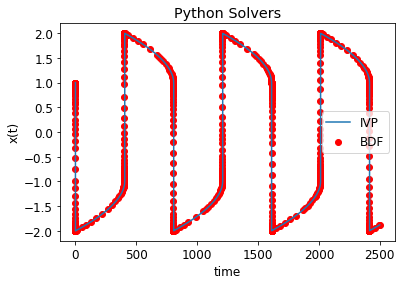

In [28]:
# Create Figure and axes
plt.plot(ivp.t, ivp.y[0])
plt.scatter(BDF.t, BDF.y[0], c= 'red')
plt.title("Python Solvers")
plt.legend(['IVP','BDF'])
plt.xlabel('time')
plt.ylabel('x(t)')

# Question #6: System of nonlinear ODE

## $m_{1}\dot{x} + k_{1}x^{3} + k_{2}(x-y)^{3} = sin(\pi t)$
## $m_{2}\dot{y} + k_{2}(y-x)^{3} = 5cos(2 \pi t)$
## $x(0) = y(0) = 0$ 
### $ m_{1} = 1, m_{2} = 2, k_{1} = 5, k_{2} = 10$
## (a) Solve the ODE using Python's solve_ivp()


Text(0.5, 1.0, 'Python Solver IVP')

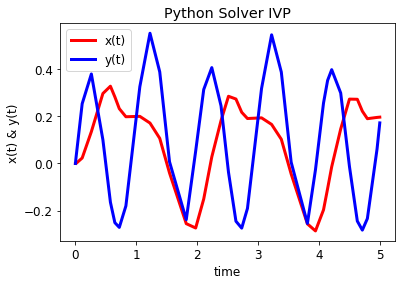

In [41]:
def lambda_func2(t, x):
    # Define the constants
    m1 = 1; m2 = 2; k1 = 5; k2= 10
    return [(np.sin(np.pi*t) - k1*x[0]**3 - k2*(x[0]-x[1])**3)/m1, (5*np.cos(2*np.pi*t) - k2*(x[1]-x[0])**3)/m2]
# IVP Runge Kutta
IVP = [0,0]
ivp_6 = solve_ivp(lambda_func2, [0, 5], IVP, method='RK45')
plt.plot(ivp_6.t, ivp_6.y[0], c= 'red', linewidth = 3)
plt.plot(ivp_6.t, ivp_6.y[1], c= 'blue', linewidth = 3)
plt.legend(['x(t)','y(t)'])
plt.xlabel('time')
plt.ylabel('x(t) & y(t)')
plt.title('Python Solver IVP')

## (b) Solve the above ODE using Forward Euler ( $\Delta T = 0.1$)